In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## Analyzing Columns

In [6]:
df["User_ID"].nunique()

5891

<AxesSubplot:>

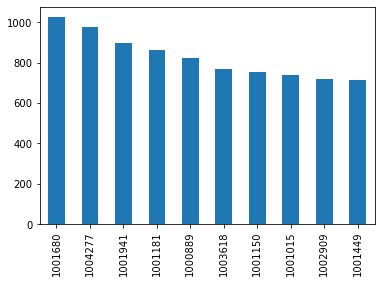

In [7]:
df['User_ID'].value_counts(ascending=False)[:10].plot(kind='bar')

In [8]:
df["Product_ID"].nunique()

3623

<AxesSubplot:>

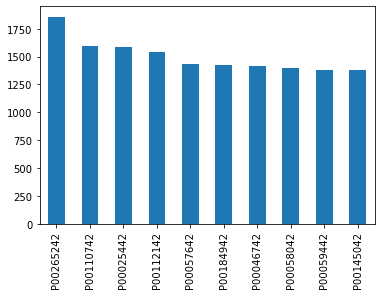

In [9]:
df["Product_ID"].value_counts(ascending=False)[:10].plot(kind="bar")

<AxesSubplot:>

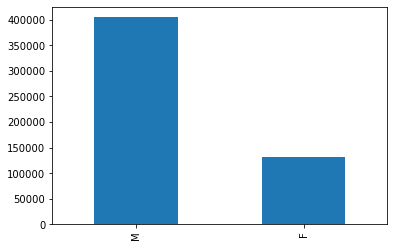

In [10]:
df["Gender"].value_counts(ascending=False).plot(kind="bar")

In [11]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

<AxesSubplot:>

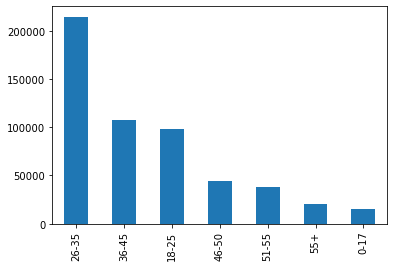

In [12]:
df["Age"].value_counts(ascending=False).plot(kind="bar")

In [13]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

<AxesSubplot:>

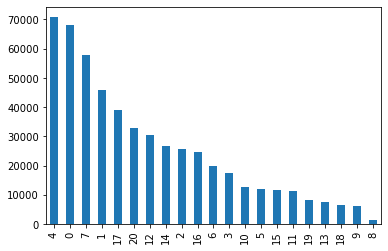

In [14]:
df["Occupation"].value_counts(ascending=False).plot(kind="bar")

In [15]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df["Marital_Status"].unique()

array([0, 1])

In [18]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

<AxesSubplot:ylabel='Frequency'>

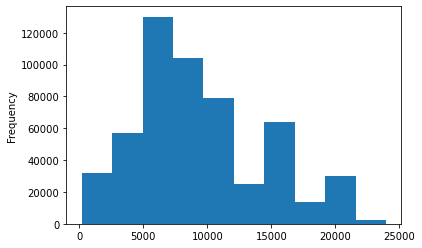

In [19]:
df["Purchase"].plot(kind="hist")

## Analyzing Gender Column

In [20]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
537572    M
537573    M
537574    M
537575    M
537576    M
Name: Gender, Length: 537577, dtype: object

In [21]:
df["Gender"].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

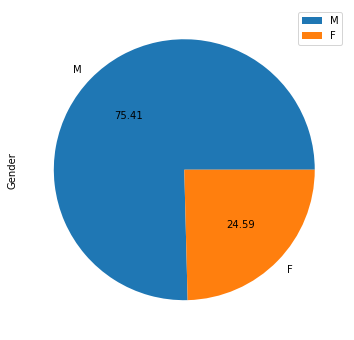

In [30]:
df["Gender"].value_counts().plot(kind="pie",figsize=(6,6),legend=True,autopct="%.2f")

<AxesSubplot:title={'center':'Percentage share wrt to Gender'}, ylabel='Purchase'>

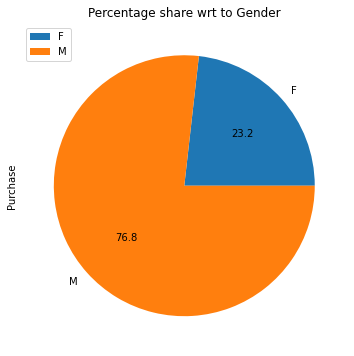

In [61]:
df.groupby("Gender")["Purchase"].sum().plot(kind='pie',autopct="%.1f",
                                            figsize=(6,6),
                                            title="Percentage share wrt to Gender",
                                           legend=True)

In [38]:
df.groupby("Gender")["Purchase"].mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

In [44]:
df.groupby("Gender")["Product_Category_1"].sum()

Gender
F     739701
M    2107063
Name: Product_Category_1, dtype: int64

In [45]:
df.groupby("Gender")["Product_Category_2"].sum()

Gender
F     899216.0
M    2748194.0
Name: Product_Category_2, dtype: float64

## Analyszing Age & Marital Status

<AxesSubplot:title={'center':'Purchase Distribution by Age'}, ylabel='Age'>

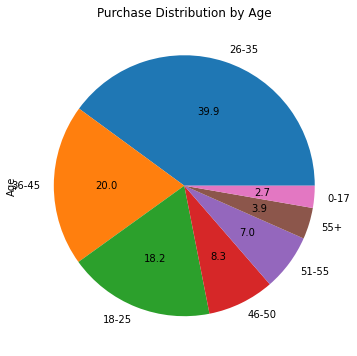

In [73]:
df["Age"].value_counts(ascending=False).plot(kind="pie",autopct="%.1f",figsize=(6,6),title="Purchase Distribution by Age")

In [68]:
df.groupby("Age")["Purchase"].mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<AxesSubplot:title={'center':'Unique Products by Age'}, xlabel='Age'>

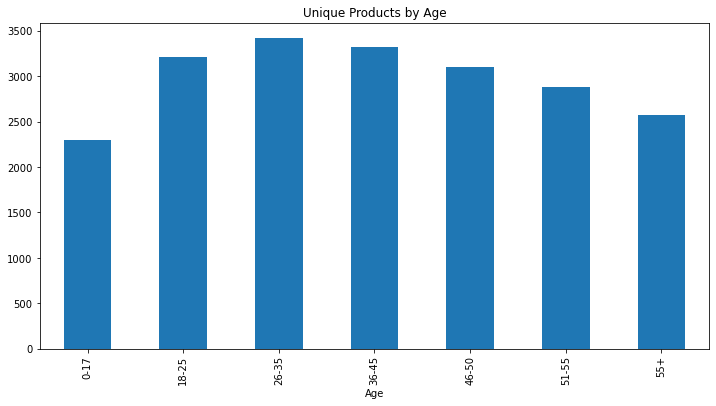

In [64]:
df.groupby("Age")["Product_ID"].nunique().plot(kind="bar",figsize=(12,6),title="Unique Products by Age")

<AxesSubplot:ylabel='Marital_Status'>

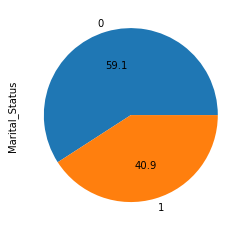

In [75]:
df["Marital_Status"].value_counts().plot(kind="pie",autopct="%.1f")

## Multi Column Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

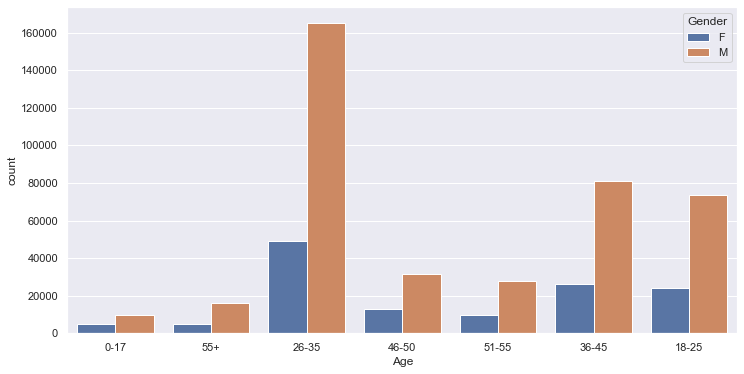

In [78]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Age",hue="Gender",data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

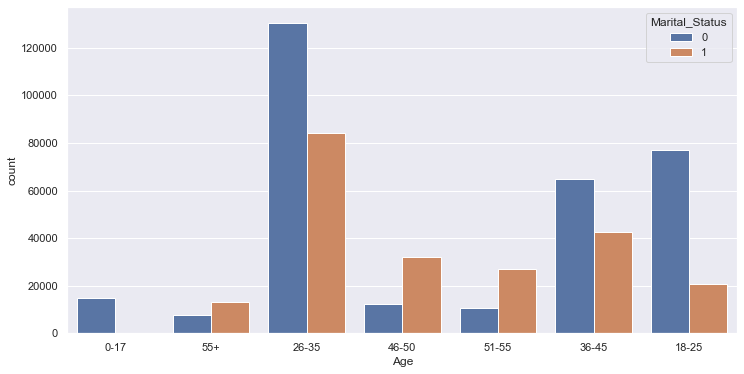

In [79]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Age",hue="Marital_Status",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

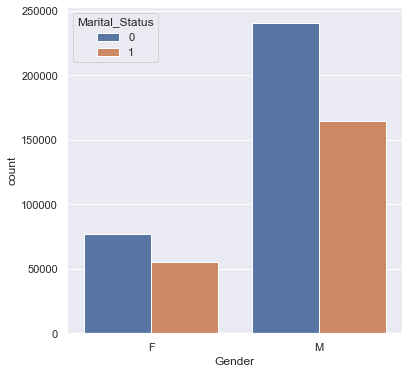

In [81]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x="Gender",hue="Marital_Status",data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

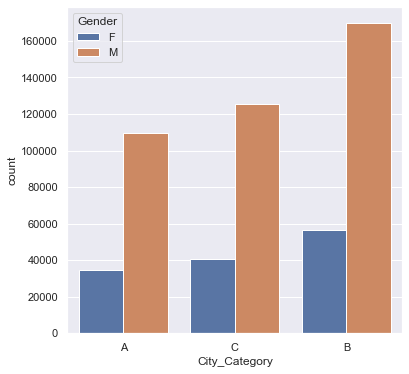

In [84]:
sns.countplot(x="City_Category",hue="Gender",data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

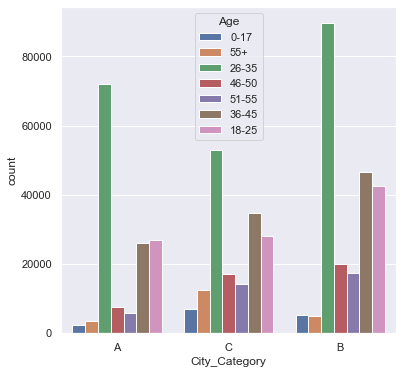

In [85]:
sns.countplot(x="City_Category",hue="Age",data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

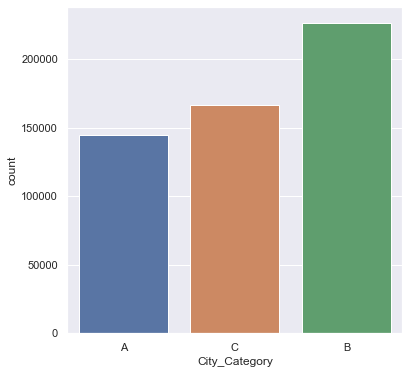

In [87]:
sns.countplot(x=df["City_Category"])

In [88]:
df.groupby("City_Category").mean()["Purchase"]

City_Category
A    8958.011014
B    9198.657848
C    9844.441855
Name: Purchase, dtype: float64